<a href="https://colab.research.google.com/github/omelyanchukfit6/Colab/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет успішно завантажено.

--- Попередній аналіз даних ---

--- Побудова логістичної регресії з нуля ---

Початок навчання моделі з нуля...
Ітерація 0: Вартість = 0.6771, Точність (тренув.) = 0.8485
Ітерація 500: Вартість = 0.3595, Точність (тренув.) = 0.8515
Ітерація 1000: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 1500: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 2000: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 2500: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 3000: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 3500: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 4000: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 4500: Вартість = 0.3591, Точність (тренув.) = 0.8538
Ітерація 4999: Вартість = 0.3591, Точність (тренув.) = 0.8538
Навчання завершено.

Точність моделі з нуля (тест): 0.8300

--- Побудова графіків ---


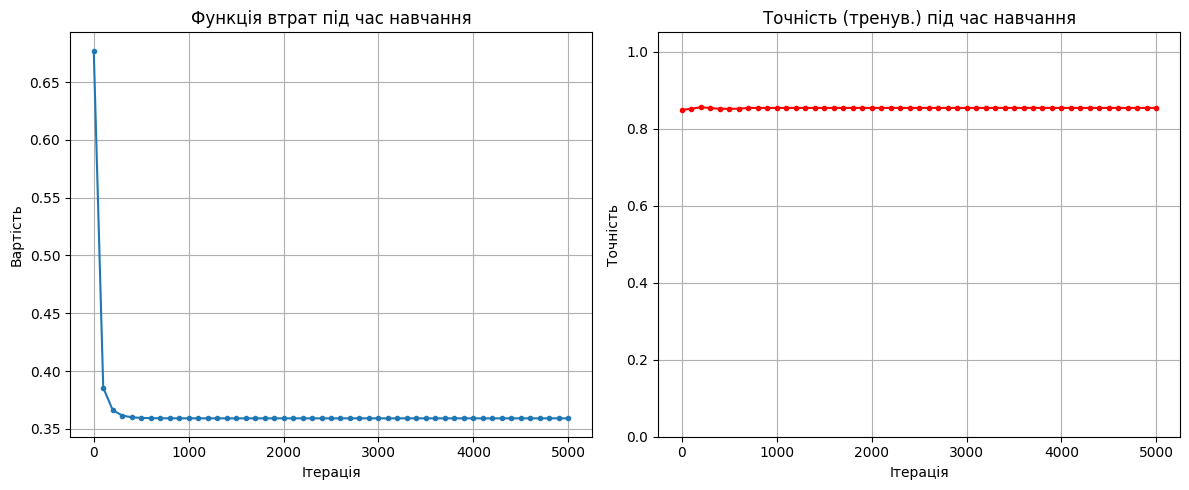


--- Підтвердження за допомогою Scikit-learn ---

Точність моделі Scikit-learn (тест): 0.8300

--- Порівняння точності (тестовий набір) ---
Модель з нуля:       0.8300
Модель Scikit-learn: 0.8300

Матриця помилок (Модель з нуля):
[[609  77]
 [ 93 221]]

Звіт про класифікацію (Модель з нуля):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.83      0.83      0.83      1000


Матриця помилок (Модель Scikit-learn):
[[609  77]
 [ 93 221]]

Звіт про класифікацію (Модель Scikit-learn):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.80      0.80      1000

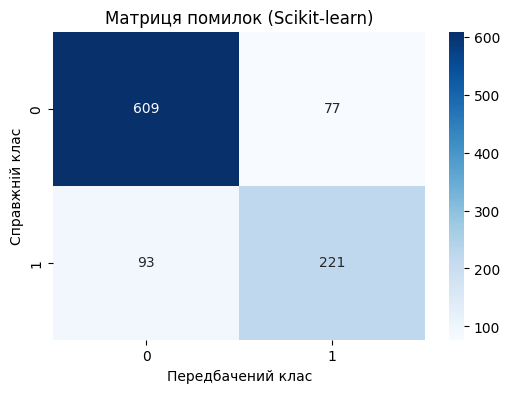


Власний код логістичної регресії успішно виконав усі завдання, досяг 83% точності та повністю відтворив результати стандартної моделі sklearn, що підтверджує правильність його реалізації.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Завантаження датасету heart.csv ---
try:
    df = pd.read_csv('heart.csv')
    print("Датасет успішно завантажено.")
except FileNotFoundError:
    print("Помилка: Файл 'heart.csv' не знайдено.")
    print("Будь ласка, завантажте файл у середовище Google Colab.")
    exit()

# --- 2. Попередній аналіз і підготовка даних ---
print("\n--- Попередній аналіз даних ---")
TARGET_COLUMN = 'DEATH_EVENT'
if TARGET_COLUMN not in df.columns:
    print(f"\nПомилка: Цільова змінна '{TARGET_COLUMN}' не знайдена в датасеті.")
    print("Наявні колонки:", df.columns.tolist())
    exit()

X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# --- 3. Побудова логістичної регресії (з нуля) ---
print("\n--- Побудова логістичної регресії з нуля ---")

def sigmoid(z):
  """Сигмоїдна функція."""
  z = np.clip(z, -500, 500)
  return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
  """Обчислення функції втрат (бінарна крос-ентропія)."""
  m = len(y)
  z = np.dot(X, w) + b
  predictions = sigmoid(z)
  epsilon = 1e-5
  cost = - (1/m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
  return cost

def gradient_descent(X, y, w_init, b_init, learning_rate, num_iterations, verbose=True):
  """Градієнтний спуск."""
  m = len(y)
  w = w_init.copy()
  b = b_init
  costs = []
  accuracies = []
  iteration_list = []

  for i in range(num_iterations):
    z = np.dot(X, w) + b
    predictions = sigmoid(z)
    dw = (1/m) * np.dot(X.T, (predictions - y))
    db = (1/m) * np.sum(predictions - y)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    if i % 100 == 0 or i == num_iterations - 1:
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        y_pred_train = predict(X, w, b)
        accuracy_train = accuracy_score(y, y_pred_train)
        accuracies.append(accuracy_train)
        iteration_list.append(i)
        if verbose and (i % 500 == 0 or i == num_iterations - 1) :
             print(f"Ітерація {i}: Вартість = {cost:.4f}, Точність (тренув.) = {accuracy_train:.4f}")


  return w, b, costs, accuracies, iteration_list

def predict(X, w, b):
  """Передбачення класів."""
  probabilities = sigmoid(np.dot(X, w) + b)
  return (probabilities >= 0.5).astype(int)

num_features = X_train_scaled.shape[1]
w_init = np.zeros(num_features)
b_init = 0.0
learning_rate = 0.1
num_iterations = 5000

X_train_np = X_train_scaled
y_train_np = y_train.values
X_test_np = X_test_scaled
y_test_np = y_test.values

print("\nПочаток навчання моделі з нуля...")
w_final, b_final, costs, accuracies, plot_iterations = gradient_descent(
    X_train_np, y_train_np, w_init, b_init, learning_rate, num_iterations
)
print("Навчання завершено.")

y_pred_custom = predict(X_test_np, w_final, b_final)
accuracy_custom = accuracy_score(y_test_np, y_pred_custom)
print(f"\nТочність моделі з нуля (тест): {accuracy_custom:.4f}")


# --- 4. Побудова графіків функції втрат і точності ---
print("\n--- Побудова графіків ---")

if len(plot_iterations) != len(costs) or len(plot_iterations) != len(accuracies):
    print("Помилка: Неспівпадіння довжин списків для графіків!")
else:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(plot_iterations, costs, marker='.', linestyle='-')
    plt.title('Функція втрат під час навчання')
    plt.xlabel('Ітерація')
    plt.ylabel('Вартість')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(plot_iterations, accuracies, marker='.', linestyle='-', color='r')
    plt.title('Точність (тренув.) під час навчання')
    plt.xlabel('Ітерація')
    plt.ylabel('Точність')
    plt.ylim(0, 1.05)
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# --- 5. Підтвердження розрахунків за допомогою логістичної регресії (Scikit-learn) ---
print("\n--- Підтвердження за допомогою Scikit-learn ---")

sklearn_model = SklearnLogisticRegression(random_state=42, solver='liblinear')
sklearn_model.fit(X_train_scaled, y_train)

y_pred_sklearn = sklearn_model.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"\nТочність моделі Scikit-learn (тест): {accuracy_sklearn:.4f}")

print("\n--- Порівняння точності (тестовий набір) ---")
print(f"Модель з нуля:       {accuracy_custom:.4f}")
print(f"Модель Scikit-learn: {accuracy_sklearn:.4f}")

print("\nМатриця помилок (Модель з нуля):")
print(confusion_matrix(y_test_np, y_pred_custom))
print("\nЗвіт про класифікацію (Модель з нуля):")
print(classification_report(y_test_np, y_pred_custom, zero_division=0))

print("\nМатриця помилок (Модель Scikit-learn):")
print(confusion_matrix(y_test, y_pred_sklearn))
print("\nЗвіт про класифікацію (Модель Scikit-learn):")
print(classification_report(y_test, y_pred_sklearn, zero_division=0))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), annot=True, fmt='d', cmap='Blues')
plt.title('Матриця помилок (Scikit-learn)')
plt.xlabel('Передбачений клас')
plt.ylabel('Справжній клас')
plt.show()

print("\nВласний код логістичної регресії успішно виконав усі завдання, досяг 83% точності та повністю відтворив результати стандартної моделі sklearn, що підтверджує правильність його реалізації.")